In [ ]:
import tensorflow as tf

from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt

train_dir = "path/to/train/images"
val_dir = "path/to/test/images"

# refitting the image size to 32x32 instead of 256x256
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    image_size=(64, 64),
    batch_size=32,
    shuffle=True,
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels="inferred",
    label_mode="int",
    image_size=(64, 64),
    batch_size=32,
    shuffle=True,
)


# Scaling down from 255 to 0-1 values
normalization_layer = tf.keras.layers.Rescaling(1.0 / 255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))

2025-02-26 15:03:51.945101: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-26 15:03:51.962498: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-26 15:03:51.967965: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-26 15:03:51.981473: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-26 15:03:54.549962: W tensorflow/compiler/tf2

Found 140002 files belonging to 2 classes.


2025-02-26 15:04:41.901416: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7500 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080, pci bus id: 0000:05:00.0, compute capability: 6.1
2025-02-26 15:04:41.901930: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 7500 MB memory:  -> device: 1, name: NVIDIA GeForce GTX 1080, pci bus id: 0000:06:00.0, compute capability: 6.1
2025-02-26 15:04:41.902377: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 7500 MB memory:  -> device: 2, name: NVIDIA GeForce GTX 1080, pci bus id: 0000:09:00.0, compute capability: 6.1
2025-02-26 15:04:41.902809: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 7500 MB memory:  -> device: 3, name: NVIDIA GeForce GTX 1080, pc

Found 39428 files belonging to 2 classes.


In [2]:
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# Model Training

# Model 1 Architecture

- **Input Layer**: (64, 64, 3)
- **Conv2D**: 32 kernels, (3x3), ReLU activation
    - **MaxPooling2D**: (2x2)
    - **Dropout**: 50%
- **Conv2D**: 64 kernels, (3x3), ReLU activation
    - **MaxPooling2D**: (2x2)
    - **Dropout**: 50%
- **Conv2D**: 64 kernels, (3x3), ReLU activation
    - **Dropout**: 50% 
- **Flatten The Data**
- **Dense**: 64 nodes, ReLU activation
- **Dense (Output Layer)**: 2 units


In [ ]:
import keras

keras.backend.clear_session()

model1 = models.Sequential()
model1.add(layers.InputLayer((64, 64, 3)))

model1.add(layers.Conv2D(32, (3, 3), activation="relu"))
model1.add(layers.Dropout(0.5))
model1.add(layers.MaxPool2D((2, 2)))

model1.add(layers.Conv2D(64, (3, 3), activation="relu"))
model1.add(layers.Dropout(0.5))
model1.add(layers.MaxPool2D((2, 2)))

model1.add(layers.Conv2D(64, (3, 3), activation="relu"))
model1.add(layers.Dropout(0.5))

model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation="relu"))
model1.add(layers.Dense(1, activation="sigmoid"))

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       589,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,273 (2.47 MB)

 Trainable params: 646,273 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
callback = [tf.keras.callbacks.EarlyStopping(patience=3)]

with tf.device("/gpu:0"):
    model1.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    m1_history = model1.fit(
        train_dataset, epochs=50, validation_data=validation_dataset, callbacks=callback
    )

Epoch 1/50


I0000 00:00:1740582303.249949 1084465 service.cc:146] XLA service 0x791d0800f550 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740582303.249972 1084465 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1080, Compute Capability 6.1
I0000 00:00:1740582303.249977 1084465 service.cc:154]   StreamExecutor device (1): NVIDIA GeForce GTX 1080, Compute Capability 6.1
I0000 00:00:1740582303.249979 1084465 service.cc:154]   StreamExecutor device (2): NVIDIA GeForce GTX 1080, Compute Capability 6.1
I0000 00:00:1740582303.249984 1084465 service.cc:154]   StreamExecutor device (3): NVIDIA GeForce GTX 1080, Compute Capability 6.1
2025-02-26 15:05:03.301299: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-26 15:05:03.533379: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  28/4376 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.5753 - loss: 0.6776 

I0000 00:00:1740582306.345557 1084465 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4376/4376 ━━━━━━━━━━━━━━━━━━━━ 38s 8ms/step - accuracy: 0.7971 - loss: 0.4243 - val_accuracy: 0.8631 - val_loss: 0.3207
Epoch 2/50
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - accuracy: 0.8835 - loss: 0.2696 - val_accuracy: 0.8884 - val_loss: 0.2621
Epoch 3/50
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step - accuracy: 0.9014 - loss: 0.2319 - val_accuracy: 0.8921 - val_loss: 0.2546
Epoch 4/50
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - accuracy: 0.9095 - loss: 0.2128 - val_accuracy: 0.8961 - val_loss: 0.2446
Epoch 5/50
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - accuracy: 0.9173 - loss: 0.1982 - val_accuracy: 0.9076 - val_loss: 0.2255
Epoch 6/50
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - accuracy: 0.9222 - loss: 0.1877 - val_accuracy: 0.9004 - val_loss: 0.2349
Epoch 7/50
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - accuracy: 0.9258 - loss: 0.1807 - val_accuracy: 0.9107 - val_loss: 0.2216
Epoch 8/50
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - accuracy: 0.9288 - loss: 0.1734 - val

In [5]:
model1.save("../models/model_1.keras")

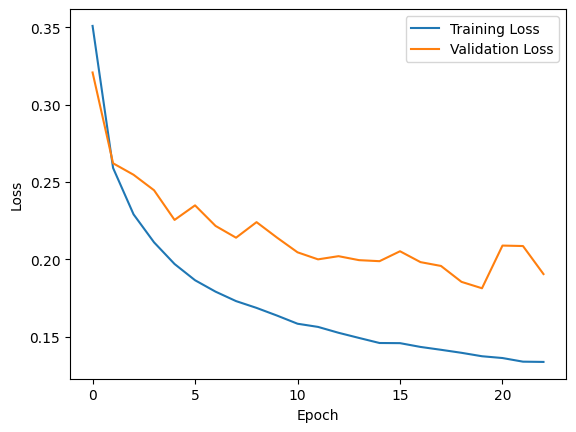

In [6]:
import matplotlib.pyplot as plt

plt.plot(m1_history.history["loss"], label="Training Loss")
plt.plot(m1_history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
keras.backend.clear_session()

model2 = models.Sequential()
model2.add(layers.InputLayer((64, 64, 3)))
model2.add(layers.Conv2D(64, (3, 3), activation="relu"))
model2.add(layers.MaxPool2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation="relu"))
model2.add(layers.MaxPool2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation="relu"))
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation="relu"))
model2.add(layers.Dense(1, activation="sigmoid"))
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485,633 (1.85 MB)

 Trainable params: 485,633 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callback = [tf.keras.callbacks.EarlyStopping(patience=3)]

with tf.device("/gpu:0"):
    model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    m2_history = model2.fit(
        train_dataset, epochs=50, validation_data=validation_dataset, callbacks=callback
    )

Epoch 1/10


  38/4376 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.4993 - loss: 0.7055 

2025-02-14 20:44:30.128489: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_1', 4 bytes spill stores, 12 bytes spill loads



4376/4376 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7847 - loss: 0.4359

2025-02-14 20:44:52.645528: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_5', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_1', 4 bytes spill stores, 12 bytes spill loads



4376/4376 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - accuracy: 0.7847 - loss: 0.4359 - val_accuracy: 0.8142 - val_loss: 0.3917
Epoch 2/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 29s 7ms/step - accuracy: 0.8725 - loss: 0.2886 - val_accuracy: 0.8546 - val_loss: 0.3247
Epoch 3/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - accuracy: 0.8939 - loss: 0.2466 - val_accuracy: 0.8668 - val_loss: 0.3132
Epoch 4/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.9047 - loss: 0.2216 - val_accuracy: 0.8679 - val_loss: 0.3168
Epoch 5/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 29s 7ms/step - accuracy: 0.9153 - loss: 0.2002 - val_accuracy: 0.8682 - val_loss: 0.3087
Epoch 6/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - accuracy: 0.9234 - loss: 0.1824 - val_accuracy: 0.8729 - val_loss: 0.3012
Epoch 7/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - accuracy: 0.9297 - loss: 0.1692 - val_accuracy: 0.8708 - val_loss: 0.3294
Epoch 8/10
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - accuracy: 0.9356 - loss: 0.1551 - val

# Model 3 Architecure

- **Input Layer**: (64, 64, 3)
- **Conv2D**: 64 kernels, (3x3), ReLU activation
    - **MaxPooling2D**: (2x2)
    - **Dropout**: 20%
- **Conv2D**: 128 kernels, (3x3), ReLU activation
    - **MaxPooling2D**: (2x2)
    - **Dropout**: 20%
- **Conv2D**: 256 kernels, (3x3), ReLU activation
    - **Dropout**: 20%
- **Flatten The Data**
- **Dense**: 128 nodes, ReLU activation
    - **Dropout**: 20%
- **Dense (Output Layer)**: 2 units

In [8]:
keras.backend.clear_session()

model3 = models.Sequential()

model3.add(layers.InputLayer((64, 64, 3)))
model3.add(layers.Conv2D(64, (3, 3), activation="relu"))
model3.add(layers.MaxPool2D((2, 2)))
model3.add(layers.Dropout(0.2))

model3.add(layers.Conv2D(128, (3, 3), activation="relu"))
model3.add(layers.MaxPool2D((2, 2)))
model3.add(layers.Dropout(0.2))

model3.add(layers.Conv2D(256, (3, 3), activation="relu"))
model3.add(layers.Dropout(0.2))

model3.add(layers.Flatten())
model3.add(layers.Dense(128, activation="relu"))
model3.add(layers.Dropout(0.2))

model3.add(layers.Dense(1, activation="sigmoid"))
model3.summary()

with tf.device("/gpu:0"):
    model3.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    m3_history = model3.fit(
        train_dataset, epochs=50, validation_data=validation_dataset, callbacks=callback
    )

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,718,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,089,665 (19.42 MB)

 Trainable params: 5,089,665 (19.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
  12/4376 ━━━━━━━━━━━━━━━━━━━━ 44s 10ms/step - accuracy: 0.5294 - loss: 1.0118

2025-02-26 15:18:43.406457: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_6', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_1', 4 bytes spill stores, 12 bytes spill loads



4376/4376 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7864 - loss: 0.4379

2025-02-26 15:19:28.080253: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_5', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_1', 4 bytes spill stores, 12 bytes spill loads



4376/4376 ━━━━━━━━━━━━━━━━━━━━ 56s 12ms/step - accuracy: 0.7864 - loss: 0.4379 - val_accuracy: 0.8704 - val_loss: 0.2903
Epoch 2/50
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 47s 11ms/step - accuracy: 0.9025 - loss: 0.2320 - val_accuracy: 0.9075 - val_loss: 0.2186
Epoch 3/50
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 47s 11ms/step - accuracy: 0.9230 - loss: 0.1890 - val_accuracy: 0.9043 - val_loss: 0.2170
Epoch 4/50
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 47s 11ms/step - accuracy: 0.9336 - loss: 0.1665 - val_accuracy: 0.9246 - val_loss: 0.1848
Epoch 5/50
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 48s 11ms/step - accuracy: 0.9397 - loss: 0.1488 - val_accuracy: 0.9190 - val_loss: 0.1866
Epoch 6/50
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 48s 11ms/step - accuracy: 0.9446 - loss: 0.1372 - val_accuracy: 0.9263 - val_loss: 0.1796
Epoch 7/50
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 48s 11ms/step - accuracy: 0.9478 - loss: 0.1314 - val_accuracy: 0.9223 - val_loss: 0.1917
Epoch 8/50
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 47s 11ms/step - accuracy: 0.9515 - loss: 0.12

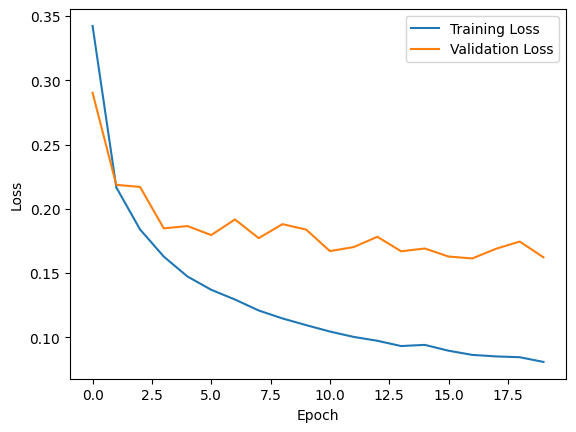

In [9]:
plt.plot(m3_history.history["loss"], label="Training Loss")
plt.plot(m3_history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
model3.save("../models/model_3.keras")